### Decision Tree Classifier Implementation With Post Preprunning

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
from sklearn.datasets import load_iris
dataset = load_iris()

import seaborn as sns
df = sns.load_dataset('iris')

#Independent and dependent features
X = df.iloc[:,:-1]
y = dataset.target

### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [63]:
import warnings
warnings.filterwarnings('ignore')

parameter = {
  'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2'] 
}

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
clf = GridSearchCV(tree_classifier, param_grid=parameter, cv=5, scoring='accuracy')

"""Splitting of train data to validation data"""
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [65]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'random'}

In [66]:
tree_classifier = DecisionTreeClassifier(criterion="log_loss" ,max_depth= 4, max_features="auto", splitter= 'best')
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='auto')

In [67]:
y_pred = tree_classifier.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [68]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [69]:
from sklearn.metrics import accuracy_score, classification_report

score = accuracy_score(y_pred,y_test)

In [70]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



[Text(0.4444444444444444, 0.9, 'x[3] <= 0.8\nlog_loss = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.7, 'log_loss = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.7, 'x[3] <= 1.75\nlog_loss = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.5, 'x[2] <= 5.35\nlog_loss = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.2222222222222222, 0.3, 'x[1] <= 2.55\nlog_loss = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.1111111111111111, 0.1, 'log_loss = 0.65\nsamples = 12\nvalue = [0, 10, 2]'),
 Text(0.3333333333333333, 0.1, 'log_loss = 0.0\nsamples = 24\nvalue = [0, 24, 0]'),
 Text(0.4444444444444444, 0.3, 'log_loss = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.7777777777777778, 0.5, 'x[0] <= 5.95\nlog_loss = 0.206\nsamples = 31\nvalue = [0, 1, 30]'),
 Text(0.6666666666666666, 0.3, 'x[1] <= 3.1\nlog_loss = 0.65\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(0.5555555555555556, 0.1, 'log_loss = 0.0\nsamples = 5\nvalue = 

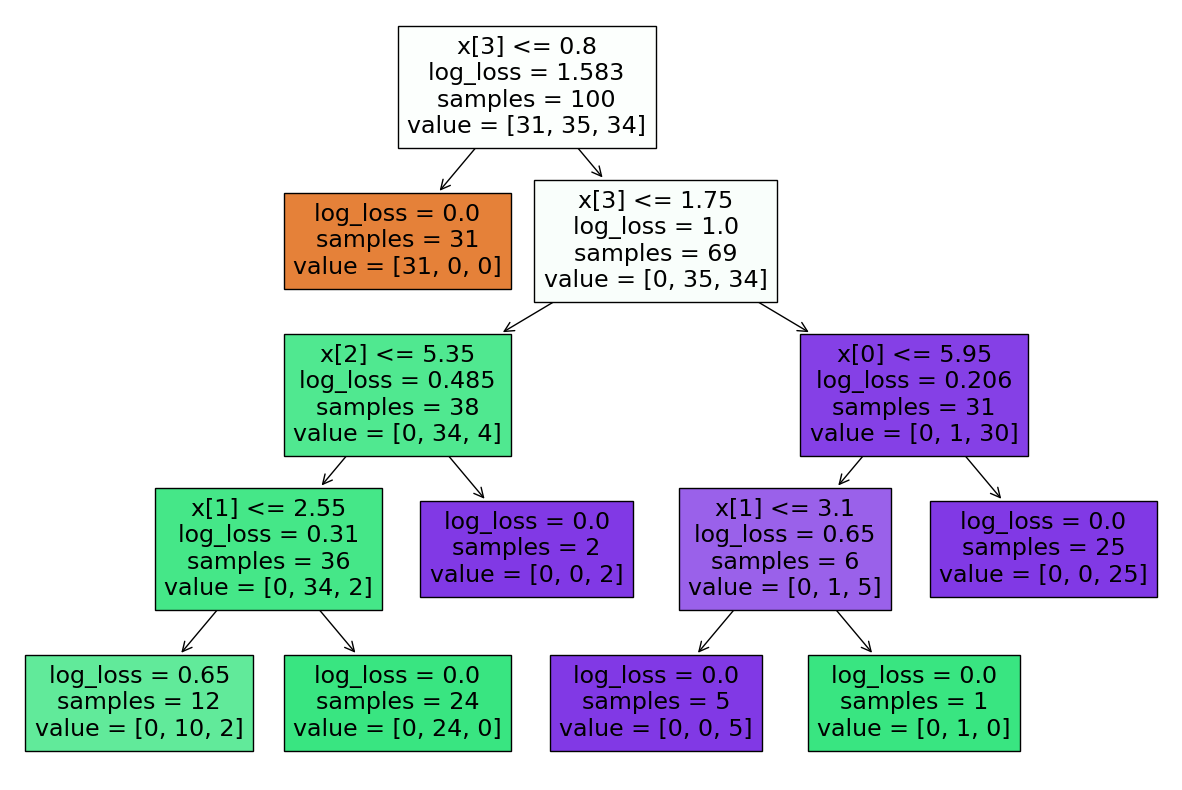

In [71]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(tree_classifier, filled=True)